In [11]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02_unflipped_no_std/test_v2'

# 01 - Begin Analysis

Enter the path to the dictionary generated by Notebook 01

In [12]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01_unflipped_no_std/tmp/dataset_dict_no_kahana_no_fx.json'

What correlation method would you like to use?
- Pearson is very fast, but depends on linearity and is sensitive to outliers
- Spearman is slower, but much more robust

In [13]:
correlation = 'spearman'

In [14]:
from calvin_utils.ccm_utils.npy_utils import DataLoader
from calvin_utils.ccm_utils.stat_utils import CorrelationCalculator
data_loader = DataLoader(dict_path)
correlation_calculator = CorrelationCalculator(method=correlation, verbose=False)
corr_map_dict = correlation_calculator.generate_correlation_maps(data_loader)

Identify Datasets that Belong to Different Categories. 

Groups (values) allocate datasets to a fixed effect analysis. If no groups, set group_dict = {}
```
{
'dataset_1': 'group1',
'dataset_2': 'group2',
'dataset_3': 'group1'
}
```

In [15]:
corr_map_dict.keys()

dict_keys(['adni_Alzheimer', 'corbetta_memory', 'manitoba_memory', 'ms_memory', 'grafmann_memory', 'queensland_memory', 'maastricth_memory', 'sante_memory', 'hebscher_tms', 'hermiller_tms_a1', 'hermiller_tms_b', 'wang_tms'])

Print out datasets

In [16]:
group_dict = {
    'adni_Alzheimer' : 'Lesion',
    'corbetta_memory' : 'Lesion',
    'manitoba_memory' : 'Lesion',
    'ms_memory' : 'Lesion',
    'grafmann_memory' : 'Lesion',
    'queensland_memory' : 'DBS',
    'maastricth_memory' : 'DBS',
    'sante_memory' : 'DBS',
    'hebscher_tms' : 'TMS',
    'hermiller_tms_a1' : 'TMS',
    'hermiller_tms_b' : 'TMS',
    'wang_tms' : 'TMS',
    }

# 02 - Use LOOCV to Train a Convergent Map on N-1 Datasets, Then Test it on the Nth dataset

Generate the Convergent Maps and Save the Individual Correlation Maps

In [17]:
from calvin_utils.ccm_utils.ccm_utils import LOOCVAnalyzer
loocv_analyzer = LOOCVAnalyzer(corr_map_dict, data_loader, 
                               convergence_type='average', 
                               similarity='spcorr',
                               method=correlation, n_bootstrap=1000, 
                               out_dir=out_dir,
                               weight=False,
                               mask_path='/Users/cu135/hires_backdrops/MNI/MNI152_T1_2mm_brain_mask.nii',
                               roi_path= '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_03_unflipped_no_std/tms_v_lesion_v_dbs_no_fornix_no_kahana_spearman/all_datasets_agreement_map.nii.gz') #'/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/resources/Memory Network T Conn.nii')
loocv_analyzer.generate_and_save_maps(group_dict=group_dict, dir='convergence_maps/')
loocv_analyzer.save_individual_r_maps(dir='group_maps/')


Removing NaNS from self.coor_map_dict.
TMS
DBS
Lesion


Run LOOCV

In [18]:
loocv_analyzer.run()
display(loocv_analyzer.results_df)

Evaluating dataset: adni_Alzheimer


Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 4666.79it/s]


Evaluating dataset: corbetta_memory


Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6336.37it/s]


Evaluating dataset: manitoba_memory


Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6664.89it/s]


Evaluating dataset: ms_memory


Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 3178.97it/s]


Evaluating dataset: grafmann_memory


Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 5801.04it/s]


Evaluating dataset: queensland_memory


Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6514.83it/s]


Evaluating dataset: maastricth_memory


Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 5741.01it/s]


Evaluating dataset: sante_memory


Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6429.79it/s]


Evaluating dataset: hebscher_tms


Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6419.72it/s]


Evaluating dataset: hermiller_tms_a1


Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6266.36it/s]


Evaluating dataset: hermiller_tms_b


Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6346.67it/s]


Evaluating dataset: wang_tms


Running bootstraps: 100%|██████████| 1000/1000 [00:00<00:00, 6584.92it/s]


,Dataset,CI Lower,CI Upper,Mean R
0,adni_Alzheimer,0.151767,0.346453,0.245983
1,corbetta_memory,-0.079478,0.393221,0.151838
2,manitoba_memory,NaN,NaN,0.626552
3,ms_memory,0.033947,0.167975,0.097844
4,grafmann_memory,-0.215200,0.057655,-0.083259
5,queensland_memory,-0.366812,0.160413,-0.091814
6,maastricth_memory,-0.689149,0.325993,-0.218927
7,sante_memory,-0.355064,0.073624,-0.151903
8,hebscher_tms,-0.086775,0.765058,0.426850
9,hermiller_tms_a1,-0.083013,0.695339,0.401936


# 03 - Compute Fixed Effects

Run It

In [19]:
import pandas as pd
df = loocv_analyzer.compute_fixed_effects_by_group(group_dict)
meta_df = pd.concat([loocv_analyzer.results_df, df], ignore_index=True)
meta_df

,Dataset,CI Lower,CI Upper,Mean R
0,adni_Alzheimer,0.151767,0.346453,0.245983
1,corbetta_memory,-0.079478,0.393221,0.151838
2,manitoba_memory,NaN,NaN,0.626552
3,ms_memory,0.033947,0.167975,0.097844
4,grafmann_memory,-0.215200,0.057655,-0.083259
5,queensland_memory,-0.366812,0.160413,-0.091814
6,maastricth_memory,-0.689149,0.325993,-0.218927
7,sante_memory,-0.355064,0.073624,-0.151903
8,hebscher_tms,-0.086775,0.765058,0.426850
9,hermiller_tms_a1,-0.083013,0.695339,0.401936


# 04 - Visualize Your Meta Analysis as a Forest Plot Figure 
- This is a meta-analysis. It presents the effect size (R/rho values) of your convergent map on the left-out map. 

Generate a Forest Plot of the Results

Saved to /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_02_unflipped_no_std/test_v2 as meta_convergence_forest_plot.svg and .png


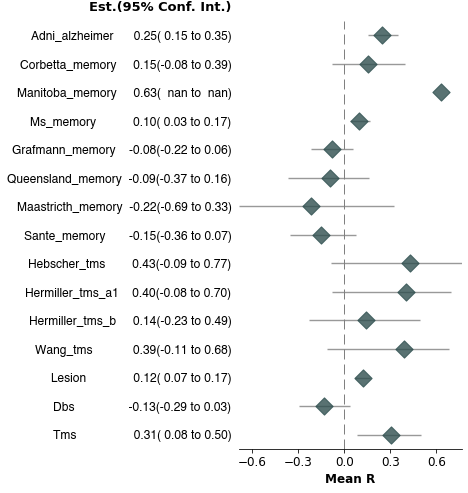

In [20]:
from calvin_utils.ccm_utils.stat_utils import MetaConvergenceForestPlot
meta_forest_plot = MetaConvergenceForestPlot(meta_df, sig_digits=2, out_dir=out_dir, table=True)
meta_forest_plot.run()

That's all

-Calvin